# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [4]:
df = pd.read_csv("/Users/michaelchoi/Desktop/MDST-tutorials/MDST-Onboarding-main/data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [5]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset? 

In [14]:
# @@@ 1
num_years = len(df["YEAR"].unique())
print("There are " + str(num_years) + " years of data logged in the dataset")

There are 33 years of data logged in the dataset


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [18]:
# @@@ 2
Michigan = df[df["STATE"] == "MICHIGAN"]
Ohio = df[df["STATE"] == "OHIO"]
if Michigan["AVG_MATH_4_SCORE"].mean() > Ohio["AVG_MATH_4_SCORE"].mean():
    print("Michigan has the higher average across all years")
elif Michigan["AVG_MATH_4_SCORE"].mean() < Ohio["AVG_MATH_4_SCORE"].mean():
    print("Ohio has the higher average across all years")
else:
    print("Both states share the same average across all years")

Ohio has the higher average across all years


Find the average for your chosen test across all states in 2019

In [21]:
# @@@ 3
data_2019 = df[df["YEAR"] == 2019]
data_2019["AVG_MATH_4_SCORE"].mean()

239.9433962264151

For each state, find a maximum value for your chosen test score

In [23]:
# @@@ 4
max_math_4_score_state = df.groupby("STATE")["AVG_MATH_4_SCORE"].max()

max_math_4_score_state

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [49]:
# @@@ 5
df["expenditure_per_student"] = df["TOTAL_EXPENDITURE"] / df["ENROLL"]
df["expenditure_per_4th"] = df["INSTRUCTION_EXPENDITURE"] / df["GRADES_4_G"]
mean_expenditure = df["expenditure_per_student"].mean()
mean_expenditure_4th = df["expenditure_per_4th"].mean()
(mean_expenditure, mean_expenditure_4th)

(10.223925200215763, 67.28133082440573)

In [50]:
df["expenditure_per_student"].fillna(mean_expenditure, inplace = True)
df["expenditure_per_4th"].fillna(mean_expenditure_4th, inplace = True)
df["expenditure_per_student"].head(200)

0      10.223925
1      10.223925
2      10.223925
3      10.223925
4      10.223925
         ...    
195     4.547439
196     5.503784
197     4.327928
198     8.885812
199     6.213181
Name: expenditure_per_student, Length: 200, dtype: float64

In [51]:
df["expenditure_per_4th"]

0       25.569528
1       51.124538
2       25.903487
3       27.844854
4       34.317171
          ...    
1710    67.281331
1711    67.281331
1712    67.281331
1713    67.281331
1714    67.281331
Name: expenditure_per_4th, Length: 1715, dtype: float64

Feature engineering justification: I have decided to create new features highlighting a per-student measure of total expenditure and relating instructional expenditure to the average 4th-grade math score. The expenditure per student helps to identify whether financial resources are distributed equitably across students and whether they may exist disparities that could affect educational achievement. In regards to the instructional expenditure per 4th grade students, this helps us examine whether or not these financial inputs are translating into academic outputs. These features can help identify areas for potential policy improvements and focusing on optimizing educational/instructional investments.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='expenditure_per_student', ylabel='AVG_MATH_4_SCORE'>

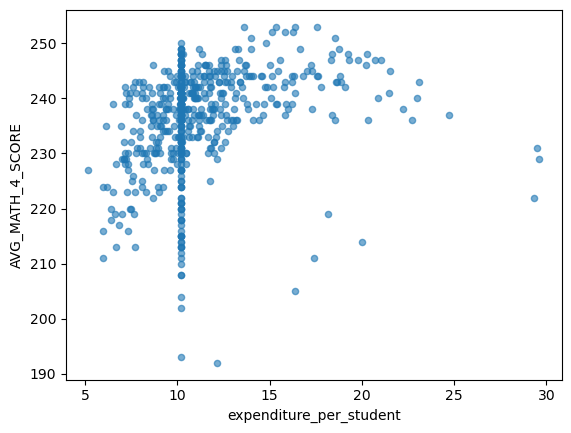

In [52]:
# @@@ 6

df.plot.scatter(x = 'expenditure_per_student', y = "AVG_MATH_4_SCORE", alpha = 0.6)

Visualization showcases the association between financial resources allocated per student and their corresponding average math scores in the 4th grade. Figure illustrates larger concentration of average test scores for lower expenditure per student, suggesting systemic limitations in funding. 

**Visualization 2**

<Axes: xlabel='expenditure_per_4th', ylabel='AVG_MATH_4_SCORE'>

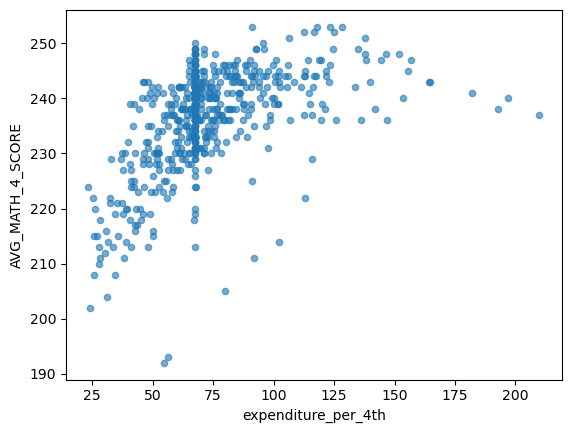

In [53]:
# @@@ 7

df.plot.scatter(x = 'expenditure_per_4th', y = "AVG_MATH_4_SCORE", alpha = 0.6)

Second visualization depicts how instructional spending efficiency correlates with academic performance in math in the 4th grade. Similar to the first visualization, there is a larger concentartion of students for lower expenditure per 4th grade students, suggesting low amounts of funding.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
# @@@ 8

X = df[["GRADES_4_G", "INSTRUCTION_EXPENDITURE", "TOTAL_EXPENDITURE"]]
y = df.loc[X.index]["AVG_MATH_4_SCORE"]

In [75]:
# @@@ 9 
non_nan_indices = y.dropna().index
X = X.loc[non_nan_indices]
y = y.loc[non_nan_indices]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [76]:
# @@@ 10
# import your sklearn class here

from sklearn.ensemble import RandomForestRegressor

In [77]:
# @@@ 11
# create your model here
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
X_train = X_train.dropna()
X_test = X_test.dropna()
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

In [78]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [80]:
y_pred = model.predict(X_test)
y_pred

array([241.55, 233.05, 243.26, 243.19, 238.42, 227.36, 242.47, 244.99,
       238.49, 241.31, 230.85, 235.11, 233.52, 226.3 , 231.78, 239.82,
       228.56, 228.16, 240.19, 240.26, 242.18, 226.5 , 225.44, 240.83,
       223.6 , 224.95, 232.62, 234.66, 242.49, 242.57, 243.03, 242.25,
       224.09, 237.71, 236.88, 245.95, 231.62, 239.  , 223.77, 232.61,
       220.83, 244.18, 237.92, 243.53, 241.54, 231.41, 231.04, 235.78,
       240.01, 233.8 , 240.32, 233.41, 241.04, 242.56, 223.15, 237.61,
       239.31, 247.13, 243.37, 238.91, 231.93, 221.31, 234.66, 234.18,
       241.18, 233.55, 238.65, 246.05, 225.23, 239.01, 237.3 , 245.72,
       238.09, 233.54, 230.41, 232.98, 231.95, 238.79, 238.8 , 244.56,
       228.29, 242.3 , 239.56, 217.76, 248.79, 238.79, 233.04, 238.35,
       232.28, 231.12, 230.34, 240.67, 214.55, 224.75, 231.71, 221.22,
       251.49, 236.1 , 242.13, 239.49, 237.7 , 237.54, 221.64, 244.15,
       238.99, 236.29, 243.14, 230.94, 242.66, 236.88, 241.7 , 243.95,
      

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [82]:
# @@@ 12

#mean error of model
np.mean(model.predict(X_test)-y_test)

0.9731578947368419

In [84]:
#mean absolute error of model
np.mean(np.abs(model.predict(X_test)-y_test))

4.176015037593984

In [85]:
#root mean squared error 
np.mean((model.predict(X_test)-y_test)**2)**0.5

5.50899926777367

In [83]:
#r-squared score
model.score(X_test, y_test)

0.6582552666825386

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

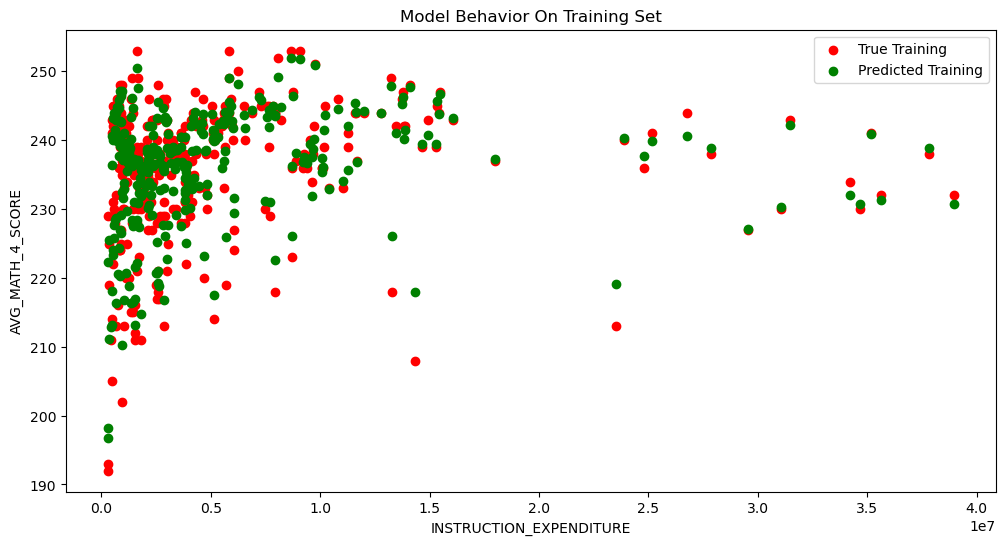

In [86]:
# @@@ 13

col_name = 'INSTRUCTION_EXPENDITURE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

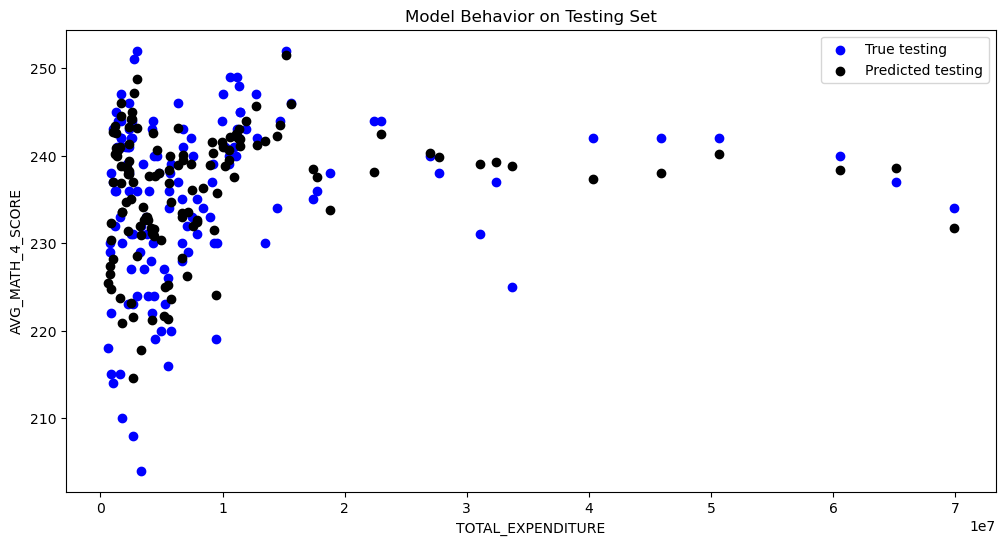

In [87]:
# @@@ 14


col_name = 'TOTAL_EXPENDITURE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior on Testing Set")